<a href="https://colab.research.google.com/github/faruk17035/MachineLearning-Using-GoogleColab/blob/main/Enzyme_A%2BX_IG_lr_0_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
print(df.head()) # print the first 5 rows

            PubchemFP2  PubchemFP3  PubchemFP4  ...  BiGram399  BiGram400  Target
PubchemFP1                                      ...                              
1                    1           0           0  ...     3.0730    0.75382       1
1                    1           0           0  ...     2.1047    0.93939       1
1                    1           1           0  ...     2.1047    0.93939       1
1                    1           1           0  ...     2.8391    1.49230       1
1                    1           0           0  ...     1.8568    1.73260       1

[5 rows x 1281 columns]


In [5]:
df.shape

(8157, 1281)

In [6]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(8157, 1280)
(8157,)


Text(0, 0.5, 'Frequency')

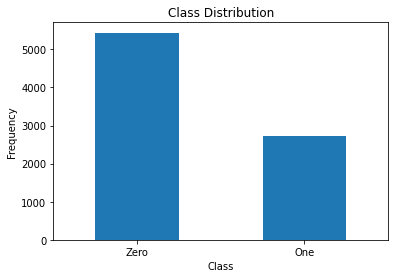

In [7]:
count_classes = pd.value_counts(df['Target'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [8]:
One = df[df['Target']==1]

Zero = df[df['Target']==0]

In [9]:
print(Zero.shape,One.shape)

(5438, 1281) (2719, 1281)


In [10]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 20)
X_res,y_res=sm.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
print(X_res.shape)
print(y_res.shape)

(10682, 1280)
(10682,)


In [12]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [14]:
## Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [15]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01592555, 0.04836306, 0.01656996, ..., 0.15379385, 0.15458536,
       0.15570249])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

939     0.164456
1044    0.163716
1169    0.163527
1068    0.163094
1018    0.162979
          ...   
288     0.000000
289     0.000000
291     0.000000
294     0.000000
845     0.000000
Length: 1280, dtype: float64

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

939     0.164456
1044    0.163716
1169    0.163527
1068    0.163094
1018    0.162979
          ...   
288     0.000000
289     0.000000
291     0.000000
294     0.000000
845     0.000000
Length: 1280, dtype: float64

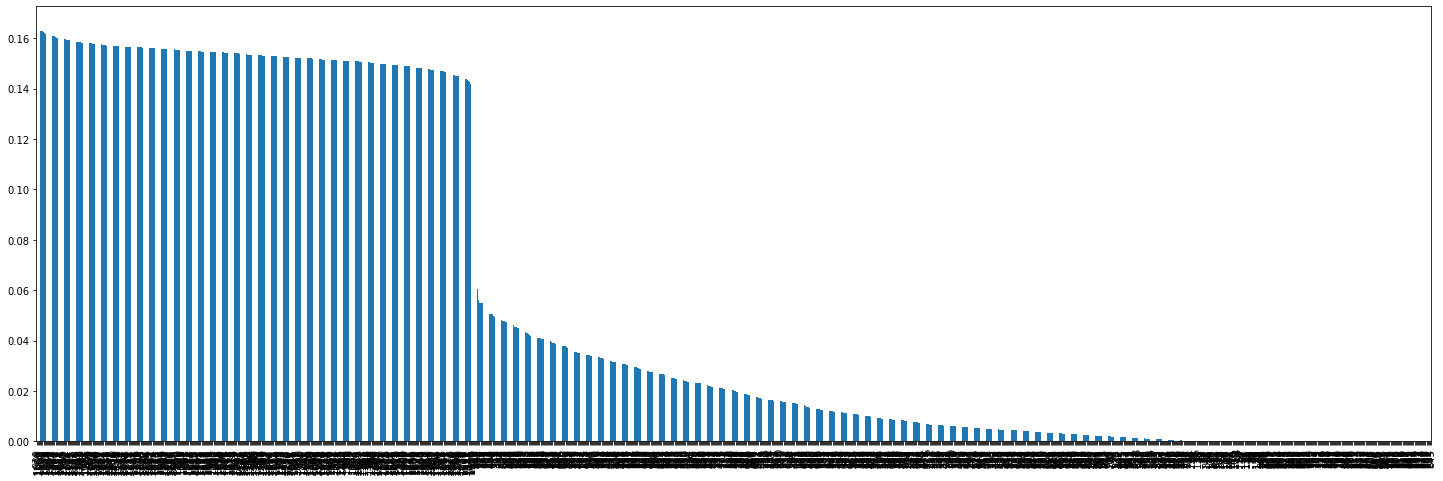

In [18]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(25, 8))

In [24]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 826 important features
#sel_five_cols = SelectKBest(mutual_info_classif, k=800)
bestfeatures_1 = SelectKBest(mutual_info_classif, k=1000) ## we will select 826 features
select = bestfeatures_1.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (9613, 1000)
X_train_selected.shape: (9613, 1000)


In [25]:
select = bestfeatures_1.fit(X_test,y_test)
X_test_selected = select.transform(X_test)

print("X_train.shape: {}".format(X_test.shape))
print("X_train_selected.shape: {}".format(X_test_selected.shape))

X_train.shape: (1069, 1000)
X_train_selected.shape: (1069, 1000)


In [26]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(9613, 1000)
(1069, 1000)


In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)


In [29]:
X_train = X_train.reshape(9613, 1000,1)
X_test = X_test.reshape(1069, 1000, 1)

In [30]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1000,1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(lr=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])

  return model

model = KerasClassifier(build_fn = built_classifier,batch_size=16,epochs=100)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,n_jobs=-1)
print(accuracies)

[0.48673946 0.49921995 0.49557981 0.51352757 0.51196671]


In [31]:
mean = accuracies.mean()
print(mean)


0.5014066994190216


In [32]:
### Now making Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = cross_val_predict(model,X_train, y_train, cv=5,n_jobs=-1)
cmann=confusion_matrix(y_train, y_pred)
print(cmann)
accuracy = (cmann[0][0]+cmann[1][1])/(cmann[0][1] + cmann[1][0] +cmann[0][0] +cmann[1][1]) 
print(accuracy*100)

[[2924 1947]
 [2844 1898]]
50.1612399875169


In [33]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_train,y_pred))

AUC =  0.5002702365483286


In [34]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
matthews_corrcoef(y_train,y_pred)

0.0005515731569109683

In [35]:
TP = cmann[0][0]
TN = cmann[1][1]
FP = cmann[0][1]
FN = cmann[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 2924
True Negatives: 1898
False Positives: 1947
False Negatives: 2844


In [36]:
sensitivity=(TP/(TP+FN))
sensitivity

0.5069348127600555

In [37]:
specificity = (TN/(TN+FP))
specificity

0.49362808842652794

In [38]:
precision = (TP/(TP+FP))
recall = (TP/(TP+FN))
print(precision)
print(recall)

0.6002874153151304
0.5069348127600555


In [39]:
f1 = (2*(precision*recall))/(precision+recall)
f1

0.5496757214023874

In [40]:
## AUPR score
from sklearn.metrics import average_precision_score
aupr=average_precision_score(y_train,y_pred)
aupr

0.49342552244348736